In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('wines.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280-OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [4]:
data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
y = data['Class']

In [6]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [7]:
y_cat = pd.get_dummies(y)

In [8]:
y_cat

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,0,0,1
174,0,0,1
175,0,0,1
176,0,0,1


In [10]:
X = data.drop('Class',axis=1)

In [11]:
X

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
import seaborn as sns

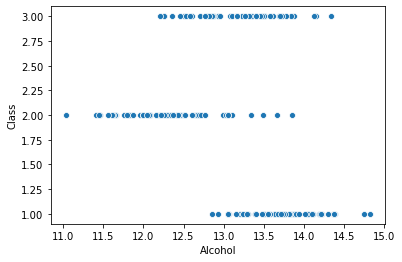

In [14]:
sns.scatterplot(x='Alcohol' , y=y , data=data)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [16]:
model = Sequential()

In [17]:
model.add(Dense(units=5 , input_shape=(13,), 
                activation='relu', 
                kernel_initializer='he_normal' ))

In [18]:
model.add(Dense(units=8 , 
                activation='relu', 
                kernel_initializer='he_normal' ))

In [20]:
model.add(Dense(units=2 , 
                activation='relu', 
                kernel_initializer='he_normal' ))

In [22]:
model.add(Dense(units=3, activation='softmax'))

In [23]:
model.compile(optimizer=RMSprop(learning_rate=0.01),  
              loss='categorical_crossentropy',
             metrics=['accuracy']
             )

In [24]:
model.fit(X,y_cat, epochs=100)

Epoch 1/100
178/178 [==============================] - 0s 634us/step - loss: 1.1044 - accuracy: 0.2978
Epoch 2/100
178/178 [==============================] - 0s 59us/step - loss: 1.0930 - accuracy: 0.3483
Epoch 3/100
178/178 [==============================] - 0s 47us/step - loss: 1.0896 - accuracy: 0.3989
Epoch 4/100
178/178 [==============================] - 0s 48us/step - loss: 1.0874 - accuracy: 0.3989
Epoch 5/100
178/178 [==============================] - 0s 57us/step - loss: 1.0874 - accuracy: 0.3989
Epoch 6/100
178/178 [==============================] - 0s 62us/step - loss: 1.0881 - accuracy: 0.3989
Epoch 7/100
178/178 [==============================] - 0s 57us/step - loss: 1.0889 - accuracy: 0.3989
Epoch 8/100
178/178 [==============================] - 0s 51us/step - loss: 1.0884 - accuracy: 0.3989
Epoch 9/100
178/178 [==============================] - 0s 53us/step - loss: 1.0875 - accuracy: 0.3989
Epoch 10/100
178/178 [==============================] - 0s 58us/step - loss: 1.08

In [25]:
model.save('modelsave.h5')